In [1]:
from Class_PINN_FBPINN import *
import matplotlib.pyplot as plt

#################################################################################################

# Common parameters
domain_extrema = [-2*torch.pi, 2*torch.pi]
activation_function = nn.Tanh()

Running on  cpu


In [3]:
w_list = [1, 15]
n_hidden_layers = 2
neurons = 16

n_subdomains = 30
overlap = 0.3
sigma = 0.1

num_points = 200*15
n_epochs = 10000

# Create the model and train it
model = FBPINN_Cos_nD(domain_extrema=domain_extrema, n_subdomains=n_subdomains, overlap=overlap, sigma=sigma, n_hidden_layers=n_hidden_layers, neurons=neurons, activation_function=nn.Tanh(), n_multi_scale=len(w_list), w_list=w_list)
history, l1_loss = model.fit(num_points, n_epochs, verbose=False)

# Save the model, the history and the l1_loss
for i in range(n_subdomains):
    # Save all the subnets
    torch.save(model.neural_networks[i].state_dict(), f'Models/FBPINN_w_{w_list[0]}_{w_list[1]}_n_hidden_layers_{n_hidden_layers}_neurons_{neurons}_n_subdomains_{n_subdomains}_overlap_{overlap}_sigma_{sigma}_subnet_{i}.pt')
np.savetxt(f'Models/FBPINN_w_{w_list[0]}_{w_list[1]}_n_hidden_layers_{n_hidden_layers}_neurons_{neurons}_n_subdomains_{n_subdomains}_overlap_{overlap}_sigma_{sigma}_history.txt', np.array(history))
np.savetxt(f'Models/FBPINN_w_{w_list[0]}_{w_list[1]}_n_hidden_layers_{n_hidden_layers}_neurons_{neurons}_n_subdomains_{n_subdomains}_overlap_{overlap}_sigma_{sigma}_l1_loss.txt', np.array(l1_loss))

Final loss:  30.9920654296875 	 Training_time:  21  min  5  s


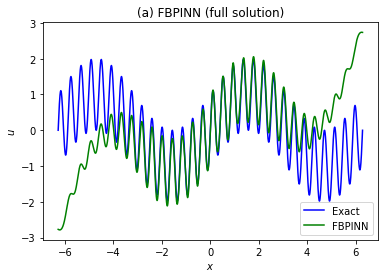

In [4]:
fig = plt.figure(figsize=(6, 4))

x = torch.linspace(domain_extrema[0], domain_extrema[1], num_points, dtype=torch.float32, device=DEVICE).reshape(-1, 1)

u_exact = model.exact_solution(x)
u_approx = torch.tanh(model.w_list[1] * x) * model(x)
plt.plot(x.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact', color="blue")
plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='FBPINN', color="green")


plt.title('(a) FBPINN (full solution)')
plt.xlabel(r'$x$')
plt.ylabel(r'$u$')
plt.legend()
plt.savefig('Plots/figure_7_c.pdf', bbox_inches='tight')